## Esercitazione del 21 Maggio 2024

# Esercizio 1

Scrivere un codice Python per l'addestramento di una rete MLP  per risolvere un problema di regressione. La rete ha la seguente architettura: un nodo di input e un nodo di output.

**Algoritmo di addestramento:**

Utilizzeremo l'algoritmo di ottimizzazione Batch Gradient Descent con passo di apprendimento learning_rate per aggiornare i pesi della rete durante l'addestramento.

## Descrizione del problema:

Consideriamo un dataset di coppie (x, y), dove x è un valore di input scalare e y è il valore di output desiderato. La rete MLP deve apprendere la relazione tra x e y in modo da poter prevedere y per nuovi valori di x.

-   Implementare la  funzione forward_propagation che calcola    l'output della rete per un dato input x.
-   Implementare la  funzione backward_propagation per calcolare il gradiente della funzione di perdita rispetto ai pesi della rete ed aggiornare i pesi con il metodo del  Gradient Descent.
       

    

Addestrare la rete:

-     Caricare un dataset di coppie (x, y).
-     Inizializzare i pesi della rete con valori casuali.
-     Iterare su un numero definito di epoche:
        Per ogni campione di training (x, y):
          -  Calcolare l'output previsto y_pred
             (forward_propagation).
        Calcolare l'errore MSE (np.mean(0.5*(y_pred - y)**2)
         -Calcolare il gradiente della funzione Costo
           rispetto ai pesi (backward_propagation).
         -Aggiornare i pesi della rete utilizzando
          l'algoritmo di Batch Gradient Descent.

   
-    Sperimentare con diversi valori di learning rate e numero di
     epoche per ottimizzare le prestazioni della rete.

-    Visualizzare il grafico della Cost-Function in funzione delle epoche

-    Usa la funzione di attivazione RELU.

Valutare le prestazioni della rete:
-    Su un set di dati di test e  Visualizzare i risultati ottenuti.

In [4]:
import numpy as np
import matplotlib.pyplot as plt


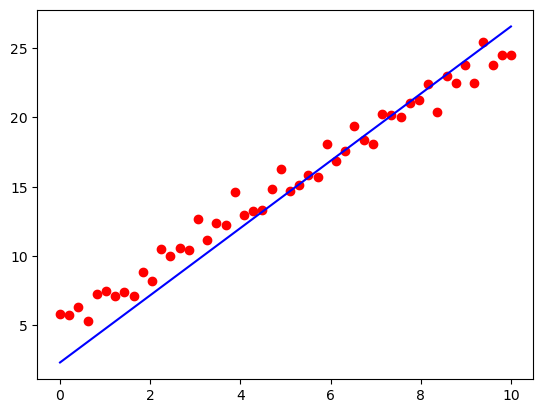

In [6]:
def relu(x):
    return np.where(x>=0,x,0)

def derivate_relu(x):
    return np.where(x>=0,1,0)

#generiamo i dati di training
x=np.linspace(0.0,10.0,50)
y=2*x+5+0.4*np.random.normal(0,2,50)

#Inizializziamo in mariera casuale pesi e bias

w=np.random.randn()
b=np.random.randn()

def forward_propagation(x,w,b):
    a=w*x+b
    z=relu(a)
    return z,a

def backward_propagation(y_pred,y,x,a,w,b,learning_rate):
    delta_1=(y_pred-y)*derivate_relu(a)
    nT=x.shape[0]
    w=w-learning_rate*np.sum(delta_1*x)/nT
    b=b-learning_rate*np.sum(delta_1)/nT
    return w,b
    
#Funzione costo
def mse(y_pred,y):
    return np.mean(0.5*(y_pred-y)**2)

epochs=5000
learning_rate=0.0005
v_fcosto=[]

for epoch in range(epochs):
    #Fase di forward propagation
    y_pred,a=forward_propagation(x,w,b)
    
    funzione_costo=mse(y_pred,y)
    v_fcosto.append(funzione_costo)
    
    w,b=backward_propagation(y_pred,y,x,a,w,b,learning_rate)
    
#Predizione su nuovi dati
x_new=np.linspace(0.0,10,100)
y_pred_new,a=forward_propagation(x_new,w,b)

plt.plot(x,y,'ro')
plt.plot(x_new,y_pred_new,'b-')
plt.show()


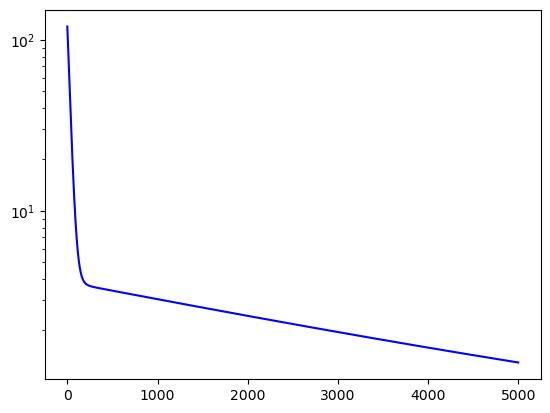

In [8]:
plt.semilogy(range(epochs),v_fcosto,'b-')
plt.show()

# Esercizio 2

Risolvere lo stesso problema cambiando l'architettura della rete:

La rete MLP avrà la seguente struttura:

    1 nodo di input che riceve il valore di x
    3 nodi nascosti con funzione di attivazione ReLU
    1 nodo di output che produce il valore previsto di y